In [1]:
import numpy as np
import cv2
import os

In [2]:
path='./digitData/'
xlis=[]
ylis=[]
for i in range(10):
    for fx in os.listdir(path+str(i)):
        if fx.endswith('.png'):
            vpath=path+str(i)
            vpath=vpath+'/'
            dataimg=cv2.imread(vpath+fx)
            dataimg=cv2.cvtColor(dataimg,cv2.COLOR_BGR2GRAY)
            dataimg=cv2.resize(dataimg,(28,28))
            data=np.asarray(dataimg)
            data=data.reshape((28,28,1))
            xlis.append(data)
            ylis.append(i)

In [3]:
xtrain=np.array(xlis)
ytrain=np.array(ylis)
print(xtrain.shape)
print(ytrain.shape)

(10181, 28, 28, 1)
(10181,)


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
xtr,xte,ytr,yte=train_test_split(xtrain,ytrain,test_size=0.2)
xtr.shape,xte.shape

((8144, 28, 28, 1), (2037, 28, 28, 1))

In [6]:
import matplotlib.pyplot as plt

3


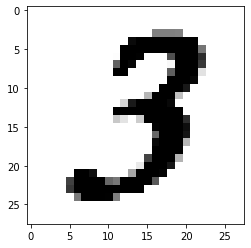

In [7]:
print(yte[2])
plt.imshow(xte[2],cmap='gray')

In [8]:
xtr=xtr.astype('float32')
xte=xte.astype('float32')
xtr=xtr/255
xte=xte/255
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

In [9]:
model = Sequential()
model.add(Conv2D(128, kernel_size=5, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=5, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
from keras.utils import to_categorical

In [12]:
ytr1hot=to_categorical(ytr)
yte1hot=to_categorical(yte)

In [22]:
history=model.fit(xtr,ytr1hot,epochs=10,validation_data=(xte,yte1hot))

Epoch 1/10
255/255 [==============================] - 86s 339ms/step - loss: 0.0141 - accuracy: 0.9964 - val_loss: 0.0142 - val_accuracy: 0.9966
Epoch 2/10
255/255 [==============================] - 97s 379ms/step - loss: 0.0325 - accuracy: 0.9925 - val_loss: 0.0200 - val_accuracy: 0.9966
Epoch 3/10
255/255 [==============================] - 97s 382ms/step - loss: 0.0218 - accuracy: 0.9945 - val_loss: 0.0121 - val_accuracy: 0.9966
Epoch 4/10
255/255 [==============================] - 98s 385ms/step - loss: 0.0191 - accuracy: 0.9945 - val_loss: 0.0115 - val_accuracy: 0.9971
Epoch 5/10
255/255 [==============================] - 98s 384ms/step - loss: 0.0261 - accuracy: 0.9941 - val_loss: 0.0193 - val_accuracy: 0.9961
Epoch 6/10
255/255 [==============================] - 97s 379ms/step - loss: 0.0267 - accuracy: 0.9939 - val_loss: 0.0381 - val_accuracy: 0.9902
Epoch 7/10
255/255 [==============================] - 94s 370ms/step - loss: 0.0323 - accuracy: 0.9926 - val_loss: 0.0181 - val_ac

In [23]:
model.save('CNNModel.h5')